In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open("results/theta/results-128.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup
0,8192,167447.268475,"[19.991256164968945, 15.567781917052343, 19.76...",6.471389,240.388414,lazy,numpy,128,10,6.170360
1,4096,71223.936740,"[16.763518185936846, 16.851553721004166, 15.63...",3.310375,117.473986,lazy,numpy,128,10,4.950776
2,2048,36255.267539,"[17.22222698596306, 17.467857328942046, 17.652...",1.641536,75.757421,lazy,numpy,128,10,4.319023
3,1024,18163.464681,"[17.466079031000845, 17.383916473016143, 17.83...",0.922223,130.296993,lazy,numpy,128,10,4.584375
4,512,9087.955938,"[17.628573889029212, 17.628335727960803, 17.62...",0.418922,46.542825,lazy,numpy,128,10,4.277192
...,...,...,...,...,...,...,...,...,...,...
63,2048,246317.081592,"[115.83273588586599, 115.7597006491851, 115.78...",1.615741,154.513581,file_system,tensorflow,128,0,0.006378
64,1024,73837.966805,"[68.08410718501545, 67.96838582516648, 67.9501...",0.781869,93.419086,file_system,tensorflow,128,0,0.004314
65,512,33248.973593,"[63.424908293178305, 63.40370937692933, 63.407...",0.406239,87.247357,file_system,tensorflow,128,0,0.004104
66,256,16747.054534,"[63.5461709338706, 63.45313413999975, 63.41726...",0.209915,81.923763,file_system,tensorflow,128,0,0.003157


In [4]:
results["avg_time"] = results["times"].apply(lambda x: np.mean(x))
results["total_time"] = results["end_time"] + results["setup"]
results["tasks_per_node"] = results["ntasks"] / results["nodes"]
results.head()

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,avg_time,total_time,tasks_per_node
0,8192,167447.268475,"[19.991256164968945, 15.567781917052343, 19.76...",6.471389,240.388414,lazy,numpy,128,10,6.170360,20.440340,246.558774,64.0
1,4096,71223.936740,"[16.763518185936846, 16.851553721004166, 15.63...",3.310375,117.473986,lazy,numpy,128,10,4.950776,17.388656,122.424762,32.0
2,2048,36255.267539,"[17.22222698596306, 17.467857328942046, 17.652...",1.641536,75.757421,lazy,numpy,128,10,4.319023,17.702767,80.076444,16.0
3,1024,18163.464681,"[17.466079031000845, 17.383916473016143, 17.83...",0.922223,130.296993,lazy,numpy,128,10,4.584375,17.737758,134.881369,8.0
4,512,9087.955938,"[17.628573889029212, 17.628335727960803, 17.62...",0.418922,46.542825,lazy,numpy,128,10,4.277192,17.749914,50.820017,4.0


In [26]:
def plot_time_vs_tasks(nodes=1, modules=["numpy", "tensorflow"], y="avg_time", sleep=10, method = None):
    for i, module in enumerate(modules):
        df = results[results["nodes"] == nodes]
        df = df[df["sleep"] == sleep]
        df = df[df["module"] == module]
        if method is not None:
            df = df[df["method"] == method]
        
        plt.subplot(1, len(modules), i+1) 
        sns.barplot(data=df, x="ntasks", y=y, hue="method")
        plt.title(f"Average Time to import {module}")
        
#     plt.gcf().suptitle(f"{y} for nodes: {nodes}")
    f = plt.gcf()
    f.set_figwidth(16)
    f.set_figheight(9)

def plot_time_vs_nodes(tasks=64, modules=["numpy", "tensorflow"], y="avg_time", sleep=10, method = None):
    for i, module in enumerate(modules):
        df = results[results["tasks_per_node"] == tasks]
        df = df[df["sleep"] == sleep]
        df = df[df["module"] == module]
        if method is not None:
            df = df[df["method"] == method]
        print(df)
        
        plt.subplot(1, len(modules), i+1) 
        sns.barplot(data=df, x="nodes", y=y, hue="method")
        plt.title(f"{module}", fontsize=20)
        
    f = plt.gcf()
    f.set_figwidth(3.5)
    f.set_figheight(9)

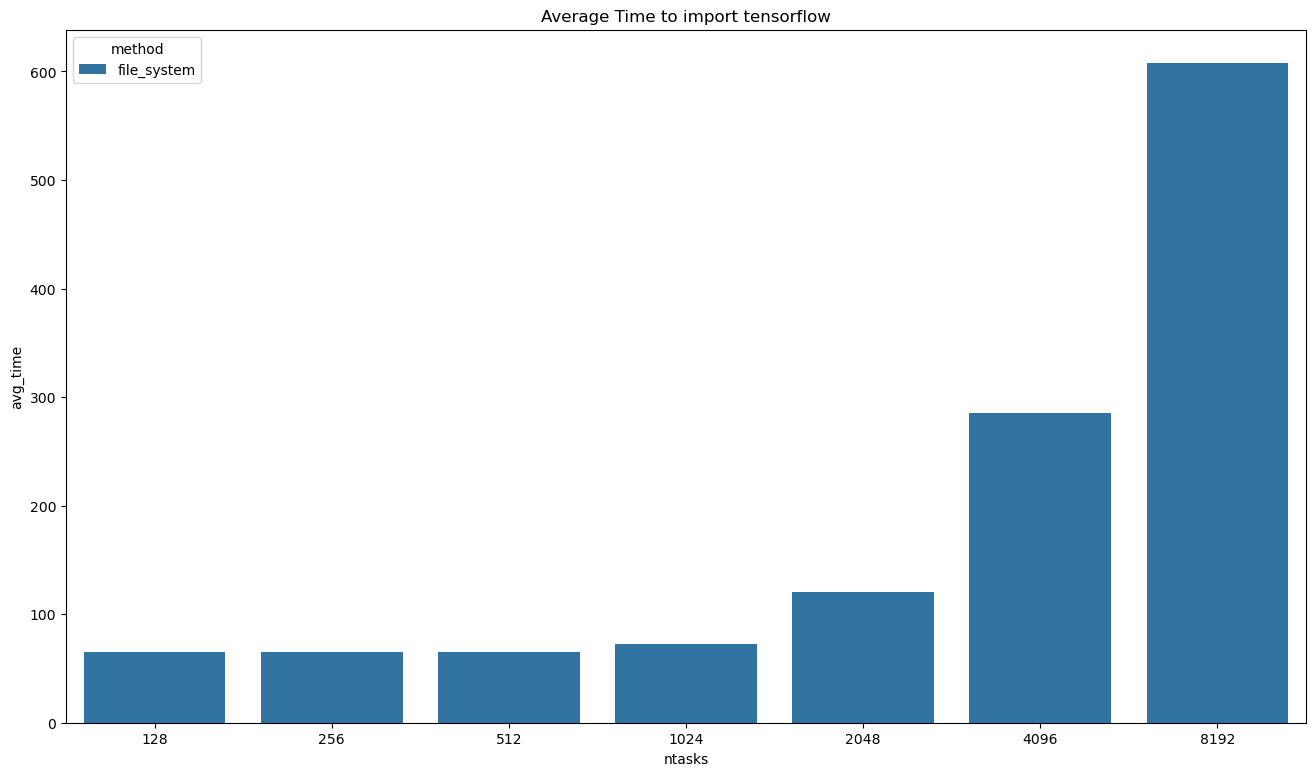

In [27]:
plot_time_vs_tasks(128, modules=["tensorflow"], sleep=0, method="file_system")

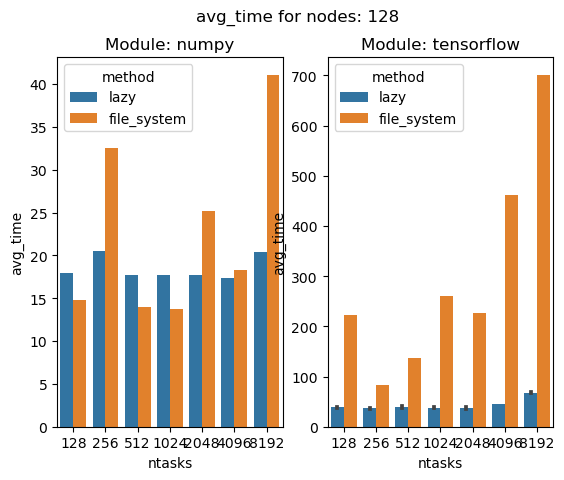

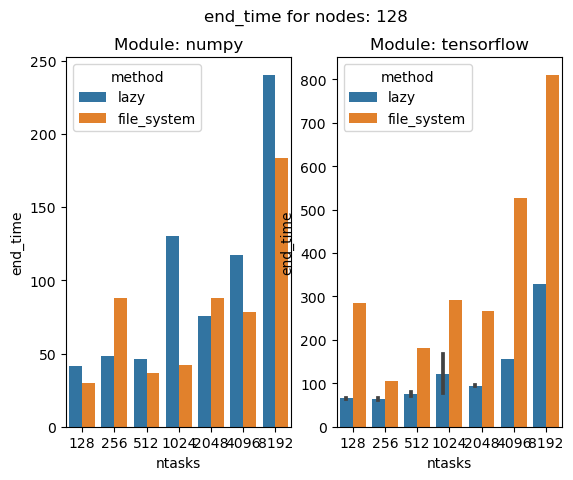

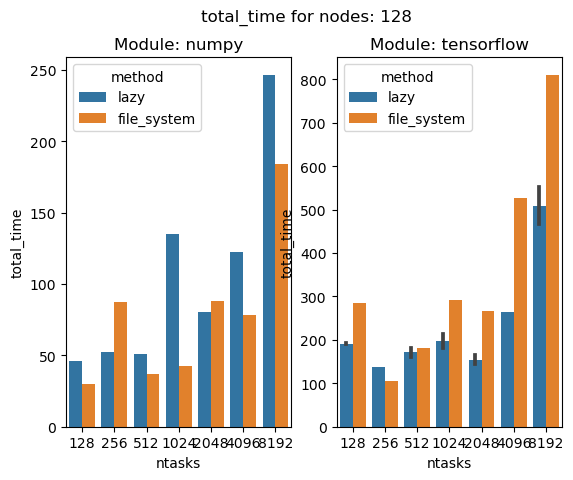

In [12]:
plot_time_vs_tasks(128)
plt.show()
plot_time_vs_tasks(128, y="end_time")
plt.show()
plot_time_vs_tasks(128, y="total_time")
plt.show()

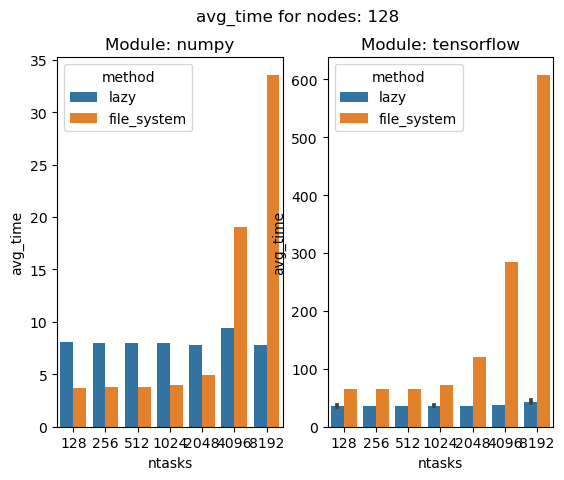

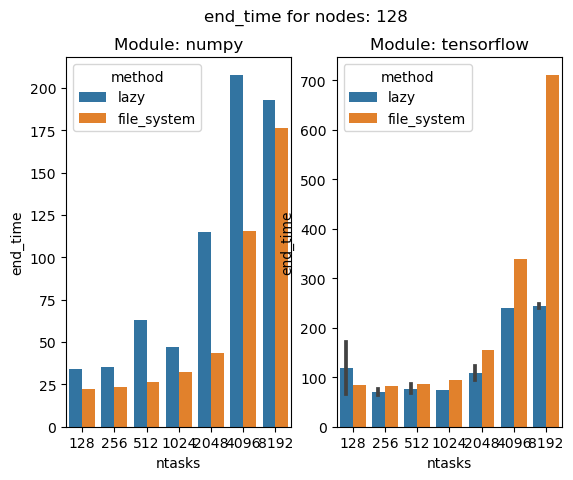

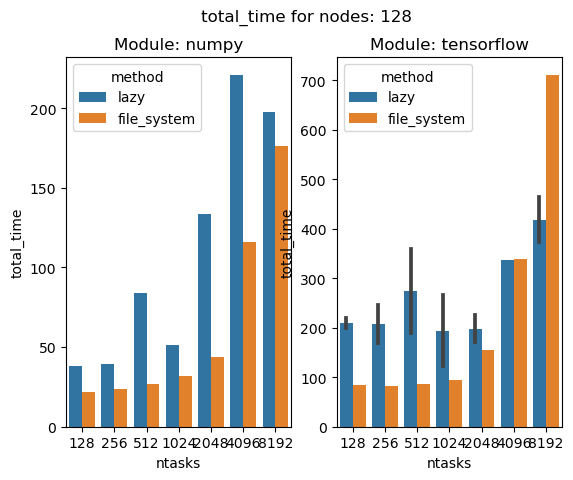

In [13]:
plot_time_vs_tasks(128, sleep=0)
plt.show()
plot_time_vs_tasks(128, y="end_time", sleep=0)
plt.show()
plot_time_vs_tasks(128, y="total_time", sleep=0)
plt.show()

In [9]:
with open("results/theta/results-simulated.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,package_size
0,8192,1.712831e+03,"[0.3284888389753178, 0.08890914393123239, 0.08...",6.525956,249.831874,lazy,sim_pack,128,0,0.362980,1
1,8192,8.476440e+04,"[5.2965283980593085, 5.34317161294166, 5.28860...",6.637083,131.419164,file_system,sim_pack,128,0,0.050512,1
2,8192,7.378807e+02,"[0.0853928909637034, 0.08898740203585476, 0.08...",6.326862,208.355199,lazy,sim_pack,128,0,0.614112,2
3,8192,1.963639e+05,"[14.926464300020598, 14.951325573027134, 14.93...",6.165972,134.529303,file_system,sim_pack,128,0,0.003160,2
4,8192,8.127254e+02,"[0.08849434496369213, 0.09114250994753093, 0.0...",6.262670,194.643497,lazy,sim_pack,128,0,0.893028,3
5,8192,4.554419e+05,"[32.81647535599768, 32.56461119593587, 32.5498...",6.436844,193.169920,file_system,sim_pack,128,0,0.002497,3
6,8192,7.896634e+02,"[0.08938309492077678, 0.09418789099436253, 0.0...",6.416602,199.573569,lazy,sim_pack,128,0,1.115109,4
7,8192,3.967499e+05,"[36.0497065319214, 36.096182137029245, 35.9602...",6.368660,159.065603,file_system,sim_pack,128,0,0.002909,4
8,8192,2.560787e+03,"[0.08513725700322539, 0.10121082596015185, 0.1...",6.261406,228.169796,lazy,sim_pack,128,0,1.347269,5
9,8192,5.246595e+05,"[39.9660270169843, 40.01346645806916, 39.89896...",6.553389,170.037827,file_system,sim_pack,128,0,0.002951,5


Text(0.5, 1.0, 'Simulated Package')

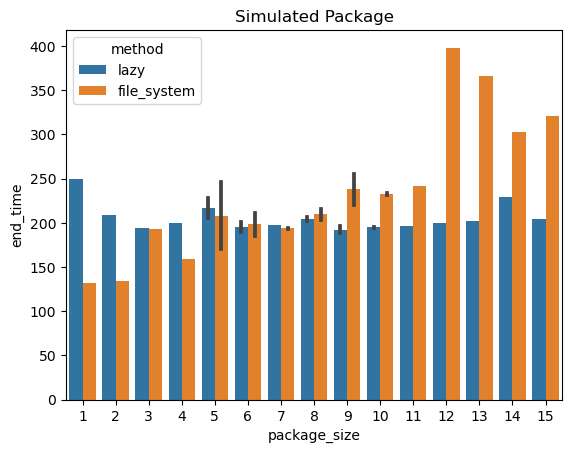

In [10]:
sns.barplot(data=results, x="package_size", y="end_time", hue="method")
plt.title(f"Simulated Package")

In [11]:
with open("results/theta/xtb_results.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,method,nodes,initial,count,batch,time
0,lazy,128,8192,32768,8192,722.122494
1,file_system,128,8192,32768,8192,720.595473
2,lazy,128,8192,32768,8192,643.533692
3,file_system,128,8192,32768,8192,651.080552
4,lazy,128,8192,32768,8192,640.375646
5,file_system,128,8192,32768,8192,639.346474
6,lazy,128,8192,32768,8192,670.661413
7,file_system,128,8192,32768,8192,917.527162


Text(0.5, 1.0, 'XTB')

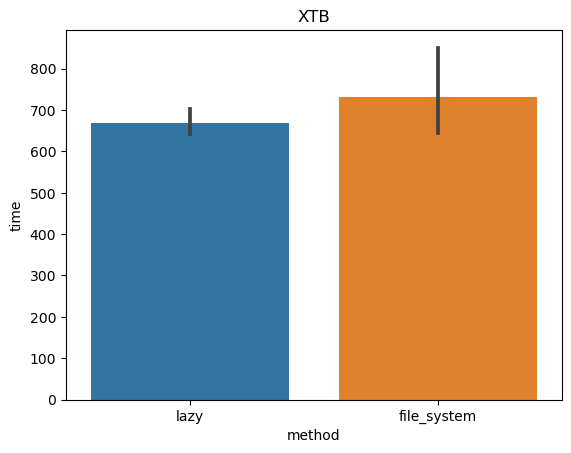

In [12]:
sns.barplot(data=results, x="method", y="time")
plt.title(f"XTB")
# plt.gcf().suptitle(f"{y} for nodes: {nodes}")

In [13]:
speedup = results[results["method"] == "file_system"]["time"].mean() / results[results["method"] == "lazy"]["time"].mean() 
print("Overall Speedup: ", speedup)

Overall Speedup:  1.094092371642059
